In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/meghan/Downloads/AlexaDataset.csv")

In [3]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback
153,5,30-Jul-18,Charcoal Fabric,We were pleasantly surprised at the sound qual...,1
1721,5,28-Jul-18,White Show,Echo Show - White&nbsp;Great new addition to o...,1
1333,3,20-Jul-18,Black Spot,I like it as an Alexa device but its small.,1
694,5,17-May-18,Black,Great product. Wakes me up every morning on time!,1
760,5,30-Jul-18,Charcoal Fabric,How easy if was to set up.,1


In [4]:
df['verified_reviews'][3]

'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.'

In [5]:
df['verified_reviews'] = df['verified_reviews'].str.lower()

In [6]:
df['verified_reviews']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [7]:
feedback = df['feedback'].value_counts()

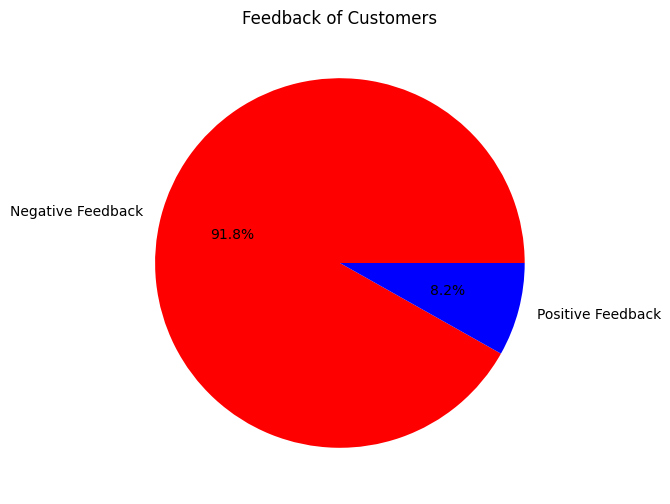

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.pie(feedback, labels = ['Negative Feedback', 'Positive Feedback'],
        autopct = '%1.1f%%', colors = ['Red' , 'Blue'])
plt.title('Feedback of Customers')
plt.show()

In [9]:
import nltk
import re

In [10]:
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [11]:
df['verified_reviews'] = df['verified_reviews'].apply(remove_html)

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
df




In [ ]:
df['verified_reviews'][2]

In [29]:
def remove_url(text):
    pattern = re.compile(r'https?://(?:[-\w.] | (?:%[\da-fA-F]{2}))+')
    return pattern.sub(r'', text)

In [31]:
df['verified_reviews'] = df['verified_reviews'][3].apply(remove_url)

AttributeError: 'str' object has no attribute 'apply'

In [14]:
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
        return text

In [28]:
df['verified_reviews'] = df['verified_reviews'][3].apply(remove_punc)

AttributeError: 'str' object has no attribute 'apply'

In [19]:
from textblob import TextBlob

In [25]:
def spell_correction(text):
    text1 = TextBlob(text)
    correct = text1.correct()
    return str(correct)

In [27]:
spell_correction(df['verified_reviews'][3])

'i have had a lot of fun with this thing. my 4 or old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.'

In [ ]:
df

In [33]:
text2 = 'heye girlish, wanna getk a drinks befored went going'
spell_correction(text2)

'here girlish, anna get a drinks before went going'

In [34]:
from nltk.corpus import stopwords

In [37]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words ]
    filtered_text = ''.join(filtered_words)
    return filtered_text

In [38]:
df['verified_reviews'] = df['verified_reviews'].apply(rem_stopwords)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/meghan/nltk_data'
    - '/home/meghan/.venv/nltk_data'
    - '/home/meghan/.venv/share/nltk_data'
    - '/home/meghan/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [43]:
import emoji

In [45]:
def rem_emoji(text):
    return emoji.demojize(text)

In [46]:
df['verified_reviews'] =  df['verified_reviews'].apply(rem_emoji)

TypeError: object of type 'float' has no len()

In [48]:
from nltk.tokenize import word_tokenize

In [49]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [51]:
df['verified_reviews'] = df['verified_reviews'].apply(tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/meghan/nltk_data'
    - '/home/meghan/.venv/nltk_data'
    - '/home/meghan/.venv/share/nltk_data'
    - '/home/meghan/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [53]:
from nltk.stem import PorterStemmer

In [54]:
def stem(text):
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(word) for word in text]
    stem_text = ''.join(stem_words)
    return stem_text

In [55]:
df['verified_reviews'] = df['verified_reviews'].apply(stem)


TypeError: 'float' object is not iterable

In [56]:
from nltk.stem import WordNetLemmatizer

In [57]:
word_net = WordNetLemmatizer()

In [59]:
def lem(text):
    for word in text:
        print(word, word_net.Lemmatize(word, pos = 'v'))

 from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv = CountVectorizer()

NameError: name 'CountVectorizer' is not defined

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer